# $H \rightarrow ZZ \rightarrow 4\ell$ (VBF vs. ggF) exercise 03
 >__Created__:  2018 Harrison B. Prosper



### Exercise
  1. Build deep network, using __MLPClassifier__, to discriminate between the Higgs boson production in the vector boson fusion mode from its production via gluon-gluon fusion.  $\Delta\eta_{jj}, m_{jj})$, which in the dataframe are $detajj$ and $massjj$, respectively
  1. Try one and two hidden layers.
  1. Vary the number of nodes/layer

In [18]:
import os, sys
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib
from sklearn.metrics import roc_curve, auc

import matplotlib as mp
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline

In [4]:
# update fonts
FONTSIZE = 20
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}

mp.rc('font', **font)

### Load Higgs boson data into memory


In [5]:
train_data, test_data = joblib.load('../../datasets/hzz_vbf_ggf.pkl')
train_data[:10]

,Z1mass,Z2mass,pt4l,eta4l,massjj,detajj,HT,dRZ1Z2,target
29799,84.92,15.18,195.00,1.2360,577.70,2.2480,499.30,1.0760,0.0
3241,71.16,21.34,155.10,-0.8630,271.20,2.7650,202.60,0.7718,1.0
18087,88.44,27.33,107.10,1.0170,67.35,0.8225,81.22,1.0020,0.0
60906,90.14,26.41,48.01,-0.7049,310.90,4.2460,75.42,1.6020,1.0
7358,94.28,20.18,121.70,-1.6450,42.73,0.7182,130.00,0.4759,0.0
24228,90.60,12.41,45.81,2.0350,131.20,2.0380,86.65,1.6670,0.0
7384,93.73,28.11,264.20,-1.1430,392.40,2.3840,385.40,0.2364,0.0
56399,86.84,21.56,196.00,1.8310,101.30,1.0220,253.20,0.6687,0.0
21227,91.32,15.66,87.89,-2.0860,649.80,6.0110,65.00,1.1480,0.0
26575,90.52,26.68,35.03,-0.2113,531.50,4.1750,135.10,1.8860,1.0


### Plot training data

In [6]:
def plotData(data, xmin=0, xmax=8, ymin=0, ymax=2000, N=1000, ftsize=FONTSIZE):
    
    # set size of figure
    plt.figure(figsize=(8, 8));

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'$\Delta\eta_{jj}$', fontsize=ftsize)
    plt.ylabel(r'$m_{jj}$ (GeV)', fontsize=ftsize)
    
    # split into sig and bkg for the purposes of plotting
    sig = data[data.target > 0.5][:N]
    bkg = data[data.target < 0.5][:N]

    plt.scatter(sig.detajj, sig.massjj, marker='o',
                s=50, c='blue', alpha=0.3, label='VBF')
    pl.legend(loc='upper left') # activate legend
    
    plt.scatter(bkg.detajj, bkg.massjj, marker='*',
                s=100, c='red',  alpha=0.3, label='ggF')
    pl.legend(loc='upper left') # activate legend
    
    plt.savefig('03_higgs_vbf_ggf_variables.png')
    plt.show()

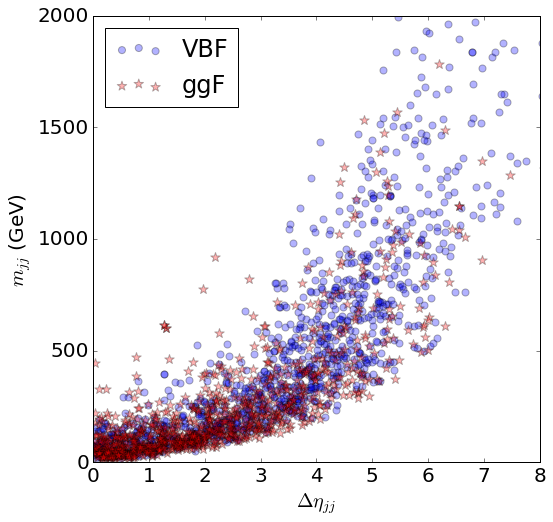

In [7]:
plotData(train_data)

### Prepare data for training/testing

In [8]:
def standardize_data(train_data, test_data, inputs):
    scaler  = StandardScaler()
    scaler.fit(train_data[inputs])
    
    X_train = scaler.transform(train_data[inputs])
    X_test  = scaler.transform(test_data[inputs])
    y_train = train_data['target']
    y_test  = test_data['target']

    return (X_train, X_test, y_train, y_test, scaler)

In [9]:
inputs = ['detajj', 'massjj']
X_train, X_test, y_train, y_test, scaler = standardize_data(train_data, test_data, inputs)

### Define function space

In [10]:
dnn = MLPClassifier(hidden_layer_sizes=(10,10), 
                    max_iter=500, 
                    alpha=1e-3,
                    solver='adam', 
                    verbose=0, 
                    tol=1e-6, 
                    warm_start=False,
                    random_state=1)

# possible combinations of params
params = {'hidden_layer_sizes': [(5,), (5,5), (5,5,5), (5,5,5,5)]}

### Train classifier

In [11]:
print "*** TRAINING ***"
#rcv = GridSearchCV(dnn, params, verbose=1)
#rcv.fit(X_train, y_train)

#print "Best set of parameters: %s" % rcv.best_params_
#mlp = rcv.best_estimator_
#mlp.fit(X_train, y_train)

mlp = dnn
mlp.verbose=1
mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))      
print("Test set score:     %f" % mlp.score(X_test,  y_test))

filename = '03_higgs_vbf_ggf_dnn.pkl'
print "save to %s" % filename
joblib.dump([mlp, scaler], filename)

*** TRAINING ***
Iteration 1, loss = 0.69997130
Iteration 2, loss = 0.60027978
Iteration 3, loss = 0.59538712
Iteration 4, loss = 0.59282661
Iteration 5, loss = 0.59114210
Iteration 6, loss = 0.59002773
Iteration 7, loss = 0.58908485
Iteration 8, loss = 0.58846432
Iteration 9, loss = 0.58766297
Iteration 10, loss = 0.58711458
Iteration 11, loss = 0.58647828
Iteration 12, loss = 0.58590575
Iteration 13, loss = 0.58543356
Iteration 14, loss = 0.58538838
Iteration 15, loss = 0.58545944
Iteration 16, loss = 0.58516132
Iteration 17, loss = 0.58516201
Iteration 18, loss = 0.58500677
Iteration 19, loss = 0.58476891
Iteration 20, loss = 0.58494523
Iteration 21, loss = 0.58475268
Iteration 22, loss = 0.58479380
Iteration 23, loss = 0.58473909
Iteration 24, loss = 0.58487379
Iteration 25, loss = 0.58474904
Iteration 26, loss = 0.58467516
Iteration 27, loss = 0.58456748
Iteration 28, loss = 0.58450656
Iteration 29, loss = 0.58434433
Iteration 30, loss = 0.58445144
Iteration 31, loss = 0.58432167


['03_higgs_vbf_ggf_dnn.pkl']

### Plot loss curve vs. epochs

In [12]:
def plotLoss(mlp, ftsize=FONTSIZE):
    y    = mlp.loss_curve_
    x    = np.array(range(len(y)))+1

    ymin = 0.99*min(y)
    ymax = 1.01*max(y)
    epoch= range(len(y))
    xmin = 0
    xmax = len(x)
    
    # set size of figure
    plt.figure(figsize=(8,4));

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'epoch', fontsize=ftsize)
    plt.ylabel(r'loss',  fontsize=ftsize)
    
    # choose color of points
    plt.plot(x, y, 'b-')
    plt.savefig('03_higgs_vbf_ggf_dnn_loss.png')
    plt.show()

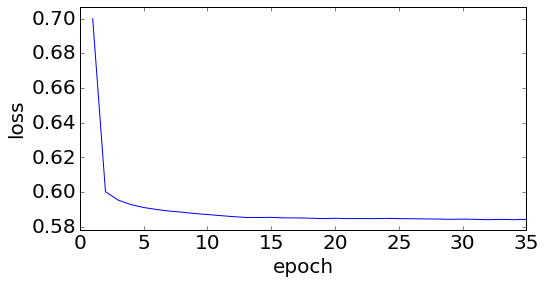

In [13]:
plotLoss(mlp)

### Plot discriminant distributions

In [14]:
def plotDistribution(mlp, X, y, nbins=100, ftsize=FONTSIZE, fgsize=(12,8)):

    # predict_proba returns (prob(class1), prob(class2))
    p  = [x for (_, x) in mlp.predict_proba(X)]

    df = pd.DataFrame({'target': y, 'prob': p}) 
    s  = df[df.target > 0.5] 
    b  = df[df.target < 0.5] 

    # set size of figure
    plt.figure(figsize=fgsize)
    
    plt.hist(b.prob, 
             bins=nbins, 
             color=(1,0,0),
             alpha=0.3,
             range=(0,1), 
             normed=True, 
             label=r'$H \rightarrow ZZ \rightarrow 4\ell$ (ggF)') 
    pl.legend(fontsize='small') # show legend using specified "label"
    
    plt.hist(s.prob, 
             bins=nbins, 
             color=(0,1,0),
             alpha=0.3,
             range=(0,1), 
             normed=True, 
             label=r'$H \rightarrow ZZ \rightarrow 4\ell$ (VBF)')
    pl.legend(fontsize='small') # show legend using specified "label"
       
    # adjust y limits
    axes = plt.gca()
    ymin, ymax = axes.get_ylim()
    delta = 0.2
    ii = int(1.3*ymax/delta)
    ymax = ii * 0.2
    axes.set_ylim((0, ymax))
    plt.savefig("03_higgs_vbf_ggf_distributions.png")
    plt.show()

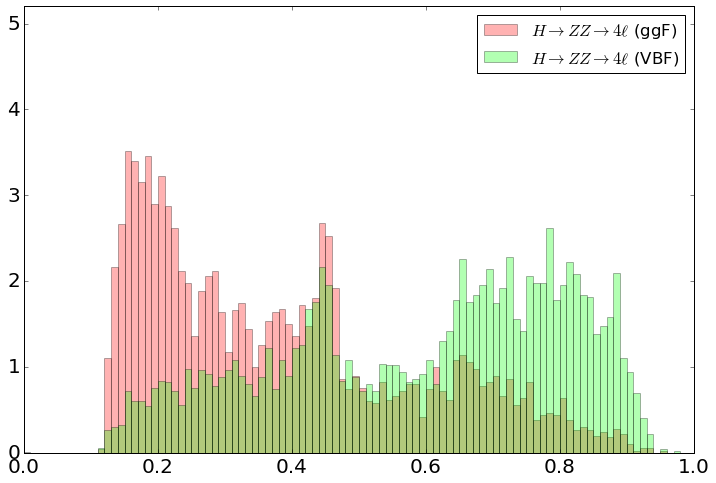

In [15]:
plotDistribution(mlp, X_test, y_test)

In [27]:
def plotROC(y, p):
    bad, good, _ = roc_curve(y, p)
    roc_auc = auc(bad, good)
    plt.figure(figsize=(8, 8))

    plt.plot(bad, good, color='red',
             lw=2, label='ROC curve, AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('fraction of ggF', fontsize=18)
    plt.ylabel('fraction of VBF', fontsize=18)
    plt.legend(loc="lower right", fontsize=18)
    plt.show()

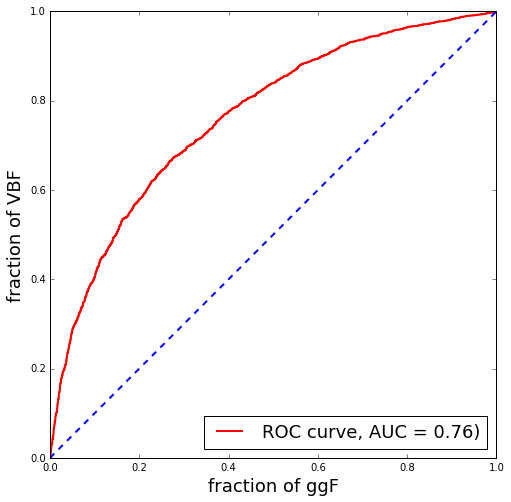

In [28]:
# predict_proba returns (prob(class1), prob(class2))
p  = [x for (_, x) in mlp.predict_proba(X_test)]
plotROC(y_test, p)

In [33]:
def plotResults(mlp, scaler, data, inputs,
                xmin=0, xmax=8, ymin=0, ymax=2000, N=2000,
                ftsize=FONTSIZE):
    
    sig = data[data.target > 0.5][:N] 
    bkg = data[data.target < 0.5][:N] 

    # set size of figure
    plt.figure(figsize=(8, 8))

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'$\Delta\eta_{jj}$', fontsize=ftsize)
    plt.ylabel(r'$m_{jj}$ (GeV)', fontsize=ftsize)
    
    # plot data
    plt.scatter(sig.detajj, sig.massjj, marker='o',
                s=50, c='blue', alpha=0.2, label='VBF')
    pl.legend(loc='upper left', fontsize=18) # activate legend
    
    plt.scatter(bkg.detajj, bkg.massjj, marker='*',
                s=100, c='red',  alpha=0.2, label='ggF')
    pl.legend(loc='upper left', fontsize=18) # activate legend
    
    # superimpose a contour plot
    # 1. first create a mesh
    # 2. compute network output at all mesh points
    npoints= 100
    xdelta = float(xmax-xmin)/npoints
    ydelta = float(ymax-ymin)/npoints
    xx = np.arange(xmin, xmax, xdelta)
    yy = np.arange(ymin, ymax, ydelta)
    XX, YY = np.meshgrid(xx, yy)
 
    # convert messh to a dataframe
    detajj = XX.flatten()
    massjj = YY.flatten()
    XY  = pd.DataFrame({'detajj': detajj, 
                        'massjj': massjj})
   
    # apply standardization
    P = scaler.transform(XY)
    # compute network value at every grid point
    # then reshape to an (npoints x npoints) array
    Z = np.array(map(lambda x: x[-1], mlp.predict_proba(P))).reshape([len(XX), len(XX)])
   
    # plot contours
    mylevels = np.arange(0,1,0.02)
    plt.contour(XX, YY, Z, levels=mylevels)
    plt.savefig('03_higgs_vbf_ggf_dnn_contours.png');

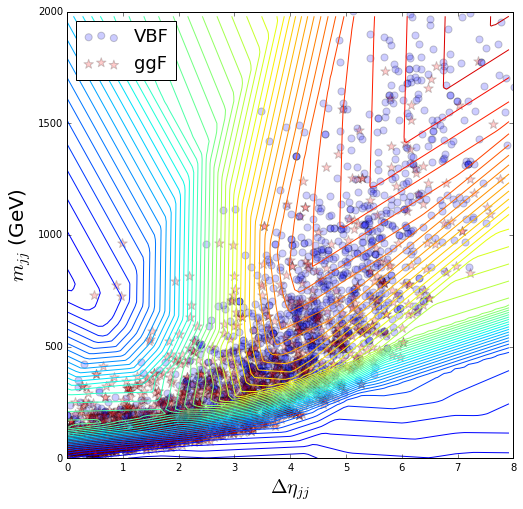

In [34]:
plotResults(mlp, scaler, test_data, inputs)